In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.tree import export_graphviz
from io import StringIO 
from sklearn import tree

import random
from pprint import pprint
 
from IPython.display import Image  
import pydotplus

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
def convert_TIDAK_YA(txt):
    if 'YA' in txt:
        return 1
    else:
        return 0
    


In [3]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [4]:
#memasukan data csv yaitu 'datapemilikpu.csv' pada folder data dan hanya mengambil sebagian kolom yang di perlukan
data = pd.read_csv("../data/datapemilukpu.csv")

In [5]:
#memeriksa apakah ada object yang memiliki nilai null
data.isnull().sum()

NAMA PARTAI POLITIK      0
NAMA CALON LEGESLATIF    0
JENIS KELAMIN            1
KECAMATAN                0
NO.URUT PARPOL           0
SUARA SAH PARTAI         0
JUML.PEROLEHAN KURSI     0
DAERAH PEMILIHAN         0
NO.URUT CALEG            4
SUARA SAH CALEG          0
TERPILIH ATAU TIDAK      0
dtype: int64

In [6]:
#menghilangkan object yang nilai atributnya null
data_clean = data.dropna()

In [7]:
data_clean.isnull().sum()

NAMA PARTAI POLITIK      0
NAMA CALON LEGESLATIF    0
JENIS KELAMIN            0
KECAMATAN                0
NO.URUT PARPOL           0
SUARA SAH PARTAI         0
JUML.PEROLEHAN KURSI     0
DAERAH PEMILIHAN         0
NO.URUT CALEG            0
SUARA SAH CALEG          0
TERPILIH ATAU TIDAK      0
dtype: int64

In [8]:
data_clean.head()

,NAMA PARTAI POLITIK,NAMA CALON LEGESLATIF,JENIS KELAMIN,KECAMATAN,NO.URUT PARPOL,SUARA SAH PARTAI,JUML.PEROLEHAN KURSI,DAERAH PEMILIHAN,NO.URUT CALEG,SUARA SAH CALEG,TERPILIH ATAU TIDAK
0,HATI NURANI RAKYAT,"TOTO SUKISNO,BSc",L,LEBAKSIU,1,18578,1,1,1,594,TIDAK
1,HATI NURANI RAKYAT,"EDI PURYANTO,SH",L,SLAWI,1,18578,1,1,2,943,TIDAK
2,HATI NURANI RAKYAT,"ELI RETNOWATI,SH",P,SLAWI,1,18578,1,1,3,1730,TIDAK
3,HATI NURANI RAKYAT,SAHYUDIN,L,DUKUHWARU,1,18578,1,1,4,2508,YA
4,HATI NURANI RAKYAT,"H.FAJAR SIGIT KUSUMAJAYA,SH",L,SLAWI,1,18578,1,2,1,923,TIDAK


In [9]:
df = data_clean
df = df.rename(columns={"TERPILIH ATAU TIDAK": "label"})

In [10]:
df.head()

,NAMA PARTAI POLITIK,NAMA CALON LEGESLATIF,JENIS KELAMIN,KECAMATAN,NO.URUT PARPOL,SUARA SAH PARTAI,JUML.PEROLEHAN KURSI,DAERAH PEMILIHAN,NO.URUT CALEG,SUARA SAH CALEG,label
0,HATI NURANI RAKYAT,"TOTO SUKISNO,BSc",L,LEBAKSIU,1,18578,1,1,1,594,TIDAK
1,HATI NURANI RAKYAT,"EDI PURYANTO,SH",L,SLAWI,1,18578,1,1,2,943,TIDAK
2,HATI NURANI RAKYAT,"ELI RETNOWATI,SH",P,SLAWI,1,18578,1,1,3,1730,TIDAK
3,HATI NURANI RAKYAT,SAHYUDIN,L,DUKUHWARU,1,18578,1,1,4,2508,YA
4,HATI NURANI RAKYAT,"H.FAJAR SIGIT KUSUMAJAYA,SH",L,SLAWI,1,18578,1,2,1,923,TIDAK


In [11]:
df = data_clean
df = df.rename(columns={"TERPILIH ATAU TIDAK": "label"})

In [12]:
df.label = df.label.apply(convert_TIDAK_YA)

In [13]:
df = pd.get_dummies(df)

In [14]:
df.head()

,NO.URUT PARPOL,SUARA SAH PARTAI,JUML.PEROLEHAN KURSI,DAERAH PEMILIHAN,SUARA SAH CALEG,label,NAMA PARTAI POLITIK_HATI NURANI RAKYAT,NAMA PARTAI POLITIK_PARTAI AMANAT NASIONAL,NAMA PARTAI POLITIK_PARTAI BARISAN NASIONAL,NAMA PARTAI POLITIK_PARTAI BINTANG REFORMASI,...,NO.URUT CALEG_10,NO.URUT CALEG_11,NO.URUT CALEG_2,NO.URUT CALEG_3,NO.URUT CALEG_4,NO.URUT CALEG_5,NO.URUT CALEG_6,NO.URUT CALEG_7,NO.URUT CALEG_8,NO.URUT CALEG_9
0,1,18578,1,1,594,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,18578,1,1,943,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,18578,1,1,1730,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,18578,1,1,2508,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,18578,1,2,923,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#split data untuk di training
X= df.loc[:, df.columns != 'label'] # Features
y = df.label # Target variable

In [16]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [17]:
# Membuat Decision Tree classifer object
clf = DecisionTreeClassifier()

# Training Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [18]:
# Model Accuracy, memeriksa seberapa besar akurasi dari data yang sudah di training
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9166666666666666


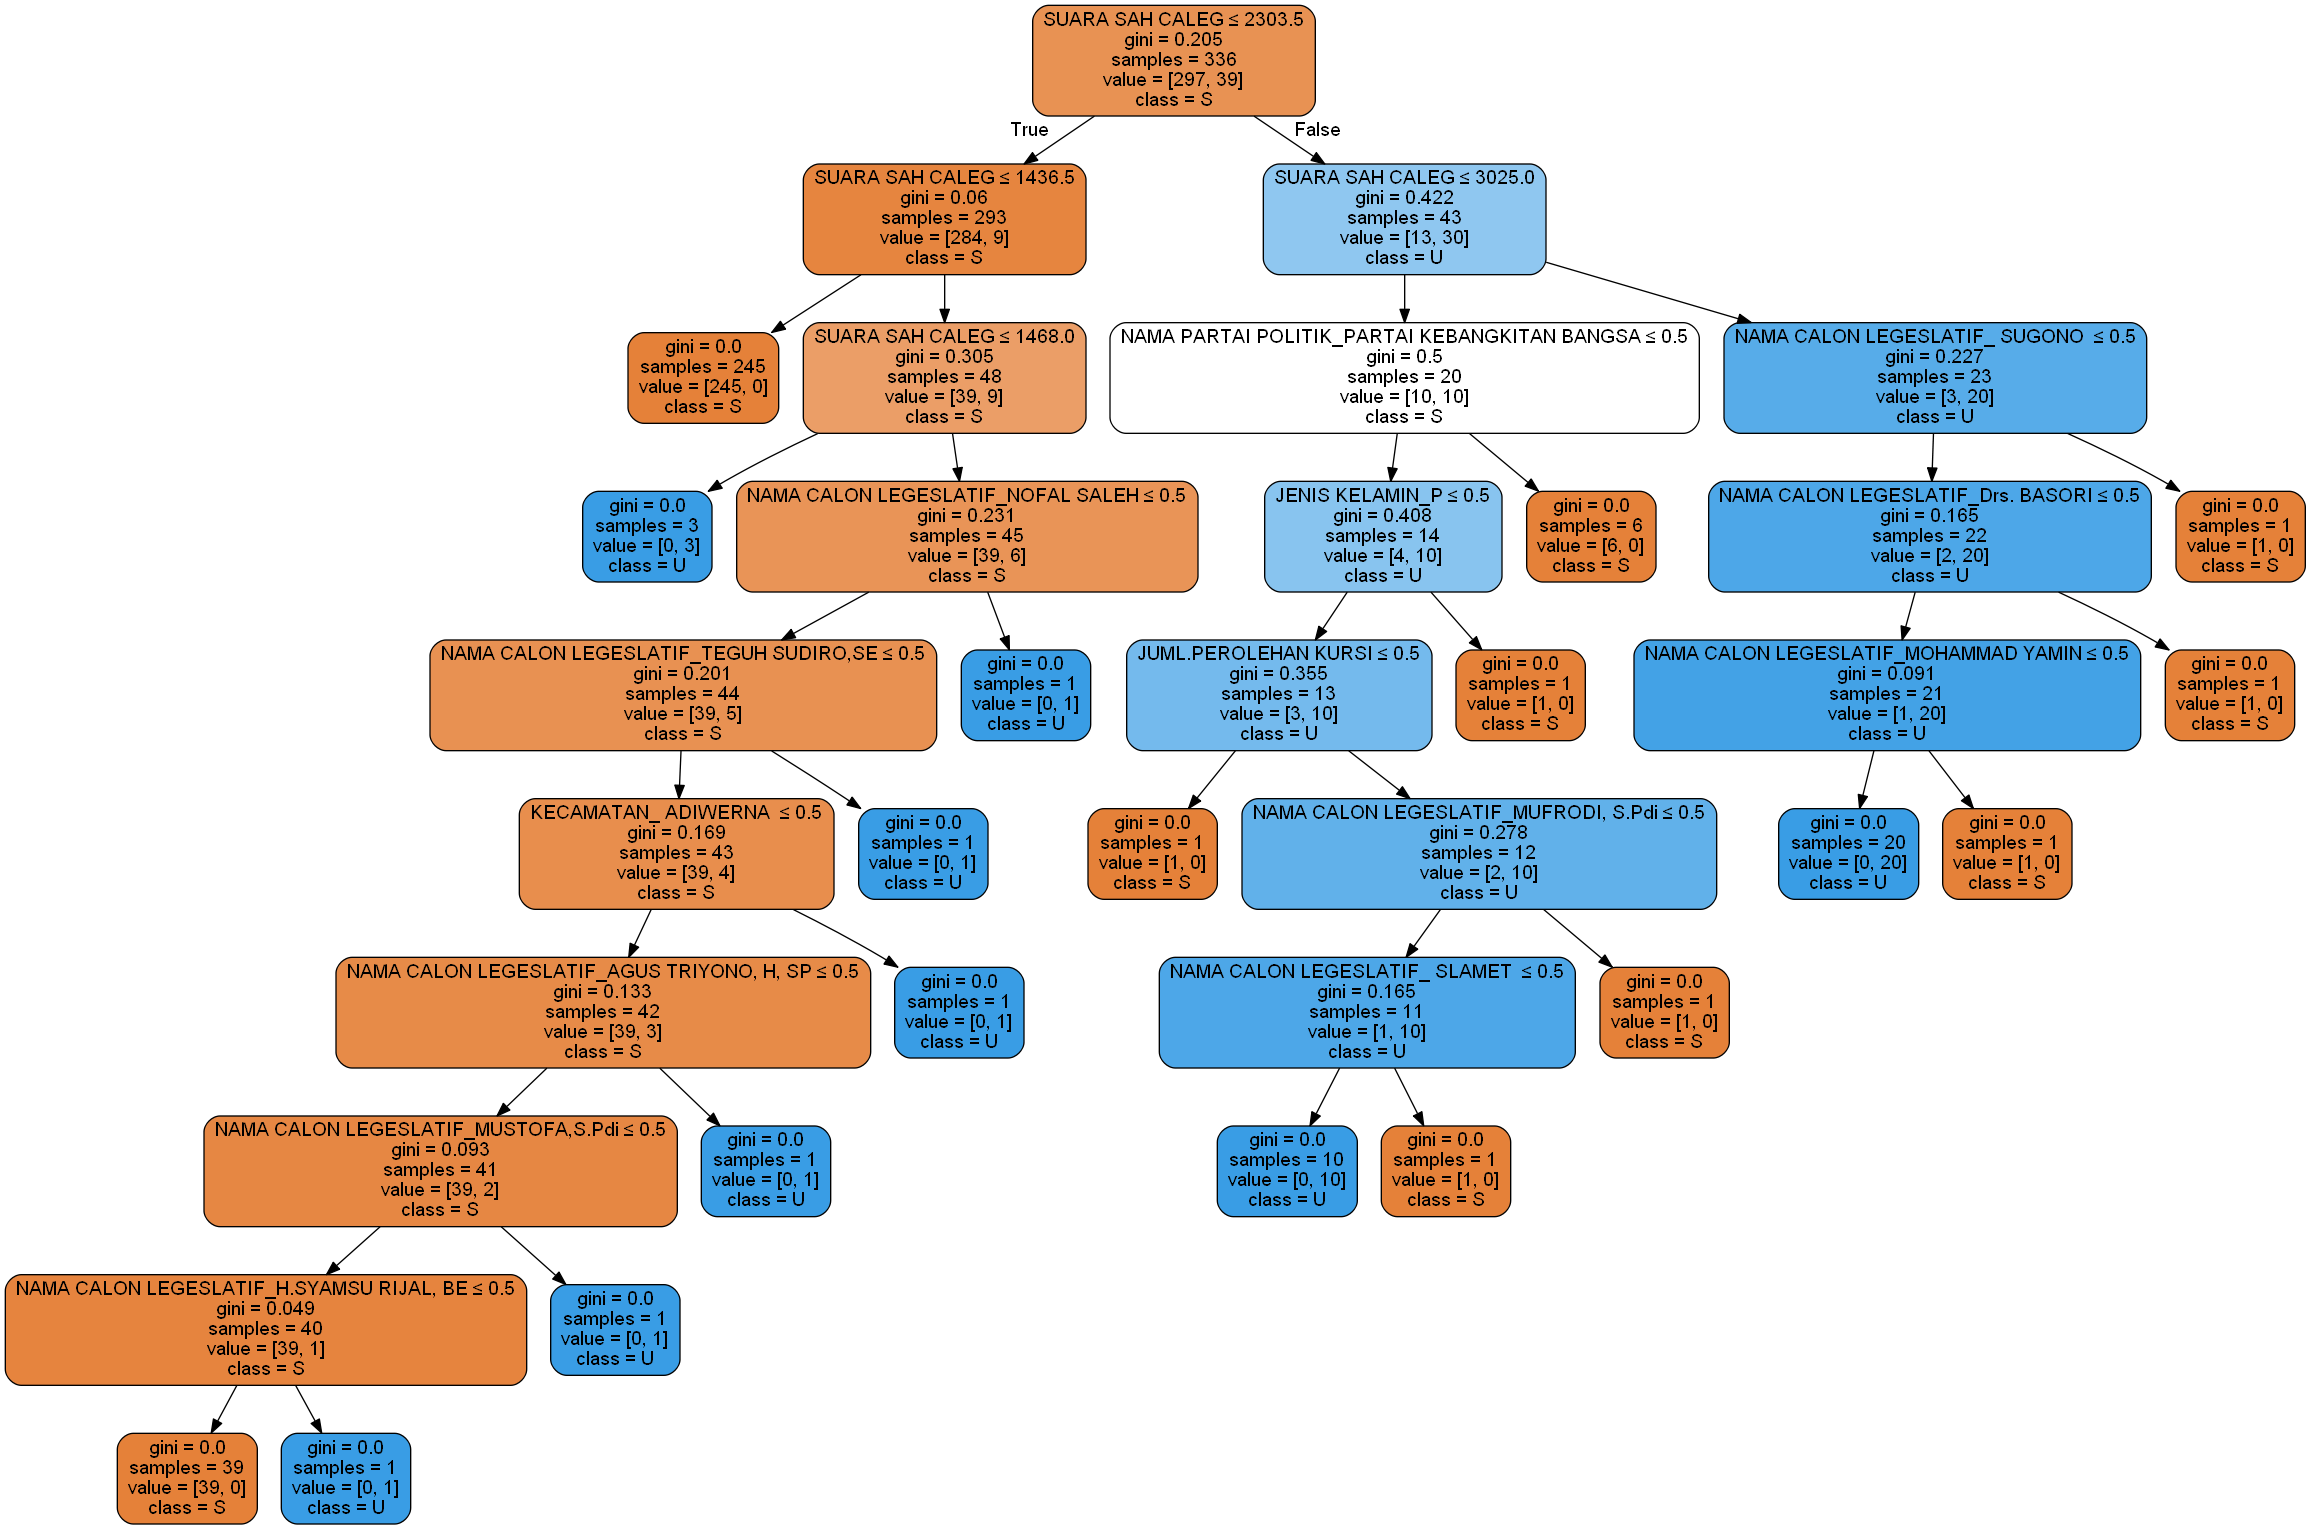

In [19]:
plot_decision_tree(clf, X_train.columns,df.columns[1])